# Problem e

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

## Implement PLA

In [2]:
def select_misclassify(res, Dy):

    rd.seed(10)
    # if(np.size(Dy,0) == 1000):
    #     print(res)
    #     print(Dy)
    mis = []
    row = np.size(Dy, 0)
    for i in range(row):
        if res[i] != Dy[i]:
            mis.append(i)
    
    if len(mis) == 0:
        return -1

    return rd.choice(mis)
'''
This function will basically implement the PLA
'''
def PLA(Dx, Dy, w):

    mis = 0
    count = 0
    while(True):
        res = np.matmul(w, np.transpose(Dx))
        res = np.sign(res)
        mis = select_misclassify(res, Dy)
        if mis == -1: break
        w = w + Dy[mis] * Dx[mis]
        count += 1
    print("It is being updated for {} times".format(count))
    return w

## Randomly generate data and run PLA

It is being updated for 263 times


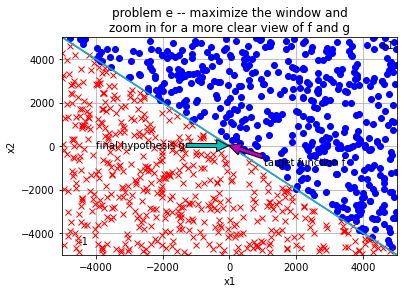

In [4]:
plt.axis([-5000, 5000, -5000, 5000])
plt.xlabel("x1")
plt.ylabel("x2")

x1 = np.arange(-5000, 5000)
x2 = np.array(-x1+2)
plt.plot(x1, x2, "m")
plt.annotate("target function f", xy=(-25, 35),
              xytext=(1042, -880), arrowprops=dict(facecolor="m"))
plt.grid(True)

'''
generate the random data set
and plot the data set based on
its corresponding y
'''
np.random.seed(14)  # reset the random seed
Dx = np.random.randint(-5000, 5001, size=(1000, 2))
Dy = list(map(lambda x: x[0] + x[1] - 2, Dx))
Dy = np.sign(Dy)

'''
positive will store the data points which has +1
negative will store the data points which has -1
'''
positive = []
negative = []
for i in range(np.size(Dy, 0)):
    if Dy[i] == 1:
        positive.append(list(Dx[i]))
    else:
        negative.append(list(Dx[i]))
# print(positive)
plt.plot(np.transpose(positive)[0], np.transpose(positive)[1], 'bo')
plt.plot(np.transpose(negative)[0], np.transpose(negative)[1], 'rx')

# initialize weight to zero vector
w = np.zeros(3)
# print("w", w)

# insert x0
Dx = np.insert(Dx, 0, 1000*[1], axis=1)
#print(np.matmul(w, np.transpose(Dx)))

# print("Dx", Dx)
# print("Dy", Dy)

'''
Compute the weight of the final hypothesis
'''
final_w = PLA(Dx, Dy, w)
# print(final_w)
test = np.matmul(final_w, np.transpose(Dx))
# print(np.sign(test))
# print(np.sign(test)-Dy)
'''
Plot the final hypothesis g function
'''
new_x2 = np.array((-final_w[1]/final_w[2])*x1+(-final_w[0]/final_w[2]))
plt.plot(x1, new_x2, "c")
plt.annotate("+1", xy=(4500, 4500))
plt.annotate("-1", xy=(-4500, -4500))
plt.annotate("final hypothesis g", xy=(-25, 18),
             xytext=(-4000, -103), arrowprops=dict(facecolor="c"))
plt.title("problem e -- maximize the window and\nzoom in for a more clear view of f and g")
plt.show()